In [90]:
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.patches as mpatches
import time
import pandas as pd
import numpy as np
# Classifier Libraries
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
import collections
#Resampling-Methode
from imblearn.under_sampling import RandomUnderSampler, NearMiss
from imblearn.over_sampling import RandomOverSampler, SMOTE
# Other Libraries
from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline
from imblearn.pipeline import make_pipeline as imbalanced_make_pipeline
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import NearMiss
from imblearn.metrics import classification_report_imbalanced
from sklearn.metrics import precision_score, recall_score, f1_score, roc_auc_score, accuracy_score, classification_report,roc_curve
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.metrics import recall_score as rs
from sklearn.metrics import precision_score as ps
from sklearn.metrics import confusion_matrix
from sklearn.metrics import confusion_matrix as cm
from sklearn.metrics import f1_score as fs
from collections import Counter
from sklearn.model_selection import GridSearchCV
from sklearn import preprocessing
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import normalize
from sklearn import metrics
from sklearn.model_selection import KFold, StratifiedKFold
import warnings
warnings.filterwarnings("ignore")

# Datensätzen einlesen

In [91]:
df =pd.read_csv(r'C:\Tensorflow Object Detection\TFODCourse\covid 19\covid_de_28_2_22.csv')

In [92]:
df

,Unnamed: 0,state,county,age_group,gender,date,cases,deaths,recovered,density_county,density_state,geschlecht_org,datum
0,0,Baden-Wuerttemberg,LK Alb-Donau-Kreis,2,F,2020-03-27,1,0,1,1358,311,0,1585267200
1,1,Baden-Wuerttemberg,LK Alb-Donau-Kreis,2,F,2020-03-28,1,0,1,1358,311,0,1585353600
2,2,Baden-Wuerttemberg,LK Alb-Donau-Kreis,2,F,2020-04-03,1,0,1,1358,311,0,1585872000
3,3,Baden-Wuerttemberg,LK Alb-Donau-Kreis,2,F,2020-10-18,1,0,1,1358,311,0,1602979200
4,4,Baden-Wuerttemberg,LK Alb-Donau-Kreis,2,F,2020-10-22,1,0,1,1358,311,0,1603324800
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10880347,10880347,Thueringen,SK Weimar,90,M,2022-01-28,1,0,1,772,132,1,1643328000
10880348,10880348,Thueringen,SK Weimar,24,F,2021-12-01,1,0,1,772,132,0,1638316800
10880349,10880349,Thueringen,SK Weimar,24,F,2021-12-11,1,0,1,772,132,0,1639180800
10880350,10880350,Thueringen,SK Weimar,47,F,2021-12-23,1,0,1,772,132,0,1640217600


In [93]:
df=df.drop(columns="Unnamed: 0", axis=True)

In [94]:
df

,state,county,age_group,gender,date,cases,deaths,recovered,density_county,density_state,geschlecht_org,datum
0,Baden-Wuerttemberg,LK Alb-Donau-Kreis,2,F,2020-03-27,1,0,1,1358,311,0,1585267200
1,Baden-Wuerttemberg,LK Alb-Donau-Kreis,2,F,2020-03-28,1,0,1,1358,311,0,1585353600
2,Baden-Wuerttemberg,LK Alb-Donau-Kreis,2,F,2020-04-03,1,0,1,1358,311,0,1585872000
3,Baden-Wuerttemberg,LK Alb-Donau-Kreis,2,F,2020-10-18,1,0,1,1358,311,0,1602979200
4,Baden-Wuerttemberg,LK Alb-Donau-Kreis,2,F,2020-10-22,1,0,1,1358,311,0,1603324800
...,...,...,...,...,...,...,...,...,...,...,...,...
10880347,Thueringen,SK Weimar,90,M,2022-01-28,1,0,1,772,132,1,1643328000
10880348,Thueringen,SK Weimar,24,F,2021-12-01,1,0,1,772,132,0,1638316800
10880349,Thueringen,SK Weimar,24,F,2021-12-11,1,0,1,772,132,0,1639180800
10880350,Thueringen,SK Weimar,47,F,2021-12-23,1,0,1,772,132,0,1640217600


In [95]:
df_dez_jan = (df['date'] >= '2020-11-15') & (df['date'] <= '2021-02-15')

In [97]:
df=df.loc[df_dez_jan]


In [98]:
df

,state,county,age_group,gender,date,cases,deaths,recovered,density_county,density_state,geschlecht_org,datum
12,Baden-Wuerttemberg,LK Alb-Donau-Kreis,2,F,2020-11-15,1,0,1,1358,311,0,1605398400
13,Baden-Wuerttemberg,LK Alb-Donau-Kreis,2,F,2020-11-17,1,0,1,1358,311,0,1605571200
14,Baden-Wuerttemberg,LK Alb-Donau-Kreis,2,F,2020-11-18,1,0,1,1358,311,0,1605657600
15,Baden-Wuerttemberg,LK Alb-Donau-Kreis,2,F,2020-11-19,1,0,1,1358,311,0,1605744000
16,Baden-Wuerttemberg,LK Alb-Donau-Kreis,2,F,2020-11-25,1,0,1,1358,311,0,1606262400
...,...,...,...,...,...,...,...,...,...,...,...,...
10880282,Thueringen,SK Weimar,90,M,2021-02-03,3,0,1,772,132,1,1612310400
10880283,Thueringen,SK Weimar,90,M,2021-02-03,3,0,1,772,132,1,1612310400
10880284,Thueringen,SK Weimar,90,M,2021-02-05,1,0,1,772,132,1,1612483200
10880285,Thueringen,SK Weimar,90,M,2021-02-11,1,0,1,772,132,1,1613001600


In [99]:
df["deaths"].sum()

57123

In [100]:
df.to_csv("dev_dec_jan.csv",index=False)

In [101]:
df =pd.read_csv(r'C:\Tensorflow Object Detection\TFODCourse\covid 19\dev_dec_jan.csv')

In [102]:
df

,state,county,age_group,gender,date,cases,deaths,recovered,density_county,density_state,geschlecht_org,datum
0,Baden-Wuerttemberg,LK Alb-Donau-Kreis,2,F,2020-11-15,1,0,1,1358,311,0,1605398400
1,Baden-Wuerttemberg,LK Alb-Donau-Kreis,2,F,2020-11-17,1,0,1,1358,311,0,1605571200
2,Baden-Wuerttemberg,LK Alb-Donau-Kreis,2,F,2020-11-18,1,0,1,1358,311,0,1605657600
3,Baden-Wuerttemberg,LK Alb-Donau-Kreis,2,F,2020-11-19,1,0,1,1358,311,0,1605744000
4,Baden-Wuerttemberg,LK Alb-Donau-Kreis,2,F,2020-11-25,1,0,1,1358,311,0,1606262400
...,...,...,...,...,...,...,...,...,...,...,...,...
1539620,Thueringen,SK Weimar,90,M,2021-02-03,3,0,1,772,132,1,1612310400
1539621,Thueringen,SK Weimar,90,M,2021-02-03,3,0,1,772,132,1,1612310400
1539622,Thueringen,SK Weimar,90,M,2021-02-05,1,0,1,772,132,1,1612483200
1539623,Thueringen,SK Weimar,90,M,2021-02-11,1,0,1,772,132,1,1613001600


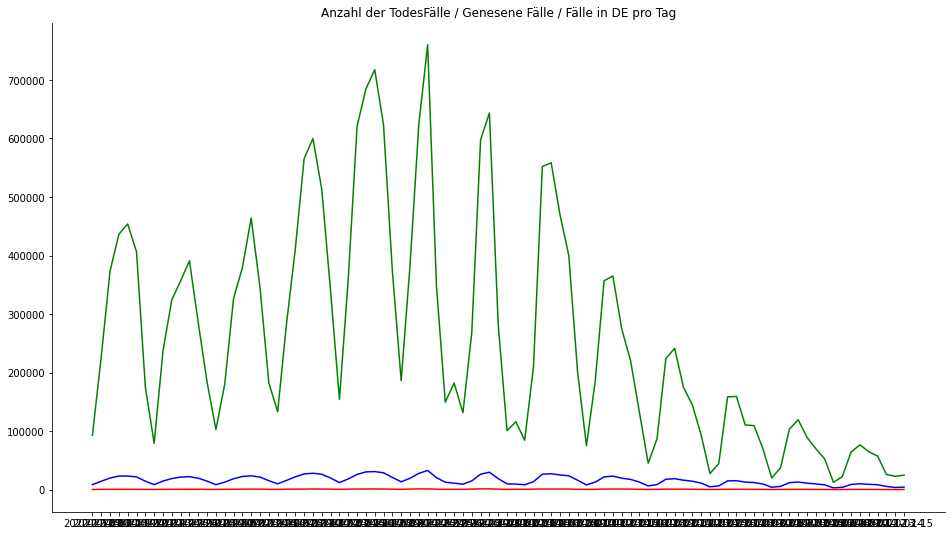

In [103]:
df_cases = df.groupby(['date']).sum().reset_index()
fig, ax = plt.subplots(figsize=(16,9))
ax.plot(df_cases["date"],
        df_cases["cases"],
        color="g");
ax.plot(df_cases["date"],
        df_cases["recovered"],
        color="b");
ax.plot(df_cases["date"],
        df_cases["deaths"],
        color="r");
ax.set_title("Anzahl der TodesFälle / Genesene Fälle / Fälle in DE pro Tag");
ax.spines["top"].set_visible(False);
ax.spines["right"].set_visible(False);

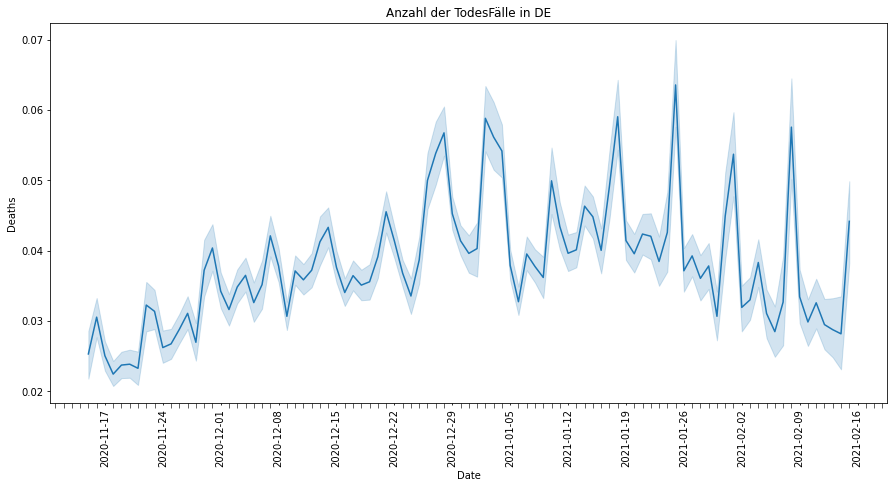

In [104]:
import matplotlib.dates as md
df['date'] = pd.to_datetime(df['date'], format = '%Y-%m-%d')
# prepare the figure
fig, ax = plt.subplots(figsize = (15, 7))

# set up the plot
sns.lineplot(ax = ax, x='date', y='deaths', data=df).set_title('Anzahl der TodesFälle in DE')

# specify the position of the major ticks at the beginning of the week
ax.xaxis.set_major_locator(md.WeekdayLocator(byweekday = 1))
# specify the format of the labels as 'year-month-day'
ax.xaxis.set_major_formatter(md.DateFormatter('%Y-%m-%d'))
# (optional) rotate by 90° the labels in order to improve their spacing
plt.setp(ax.xaxis.get_majorticklabels(), rotation = 90)

# specify the position of the minor ticks at each day
ax.xaxis.set_minor_locator(md.DayLocator(interval = 1))

# set ticks length
ax.tick_params(axis = 'x', which = 'major', length = 2)
ax.tick_params(axis = 'x', which = 'minor', length = 5)

# set axes labels
plt.xlabel('Date')
plt.ylabel('Deaths')

# show the plot
plt.show()

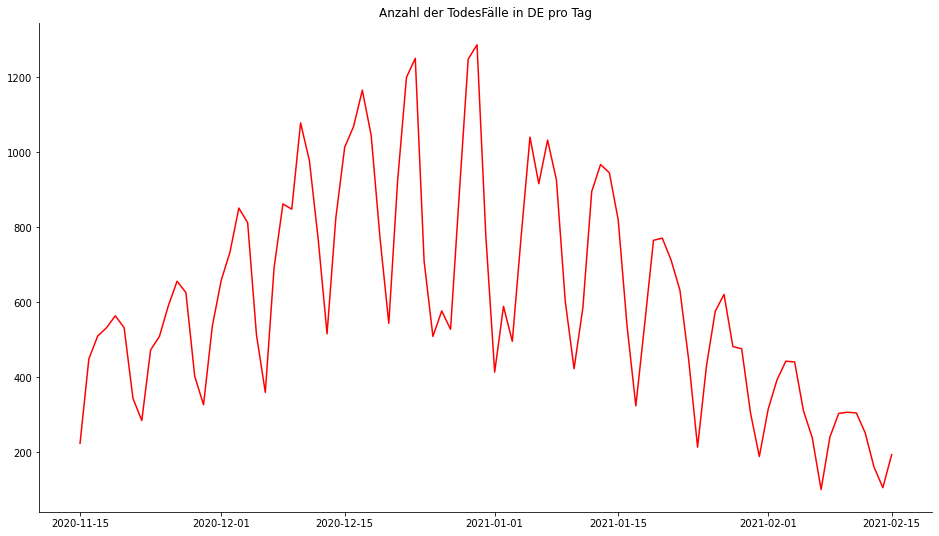

In [105]:
df_cases = df.groupby(['date']).sum().reset_index()
fig, ax = plt.subplots(figsize=(16,9))
# ax.plot(df_cases["date"],
#         df_cases["cases"],
#         color="g");
# ax.plot(df_cases["date"],
#         df_cases["recovered"],
#         color="b");
ax.plot(df_cases["date"],
        df_cases["deaths"],
        color="r");
ax.set_title("Anzahl der TodesFälle in DE pro Tag");
ax.spines["top"].set_visible(False);
ax.spines["right"].set_visible(False);

In [106]:
df

,state,county,age_group,gender,date,cases,deaths,recovered,density_county,density_state,geschlecht_org,datum
0,Baden-Wuerttemberg,LK Alb-Donau-Kreis,2,F,2020-11-15,1,0,1,1358,311,0,1605398400
1,Baden-Wuerttemberg,LK Alb-Donau-Kreis,2,F,2020-11-17,1,0,1,1358,311,0,1605571200
2,Baden-Wuerttemberg,LK Alb-Donau-Kreis,2,F,2020-11-18,1,0,1,1358,311,0,1605657600
3,Baden-Wuerttemberg,LK Alb-Donau-Kreis,2,F,2020-11-19,1,0,1,1358,311,0,1605744000
4,Baden-Wuerttemberg,LK Alb-Donau-Kreis,2,F,2020-11-25,1,0,1,1358,311,0,1606262400
...,...,...,...,...,...,...,...,...,...,...,...,...
1539620,Thueringen,SK Weimar,90,M,2021-02-03,3,0,1,772,132,1,1612310400
1539621,Thueringen,SK Weimar,90,M,2021-02-03,3,0,1,772,132,1,1612310400
1539622,Thueringen,SK Weimar,90,M,2021-02-05,1,0,1,772,132,1,1612483200
1539623,Thueringen,SK Weimar,90,M,2021-02-11,1,0,1,772,132,1,1613001600


<AxesSubplot:title={'center':'deaths'}>

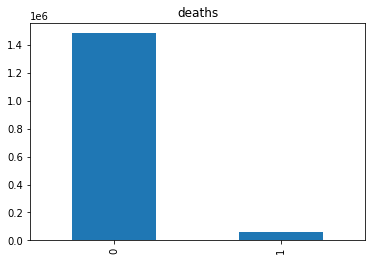

In [107]:
df["deaths"].value_counts().plot.bar(title='deaths')

<AxesSubplot:title={'center':'gender'}>

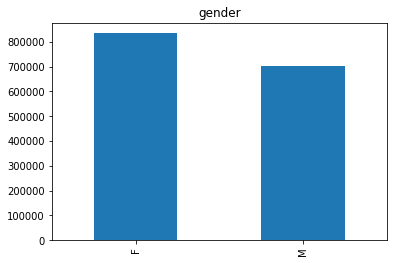

In [108]:
REASON_count= df["gender"].value_counts().rename_axis('gender').reset_index(name='Total Count')
df["gender"].value_counts().plot.bar(title='gender')

<AxesSubplot:title={'center':'age_group'}>

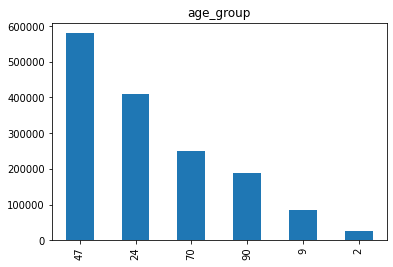

In [109]:
REASON_count= df["age_group"].value_counts().rename_axis('gender').reset_index(name='Total Count')
df["age_group"].value_counts().plot.bar(title='age_group')

<AxesSubplot:title={'center':'TodesFälle nach Altergruppen in DE'}, xlabel='age_group', ylabel='Todesfälle'>

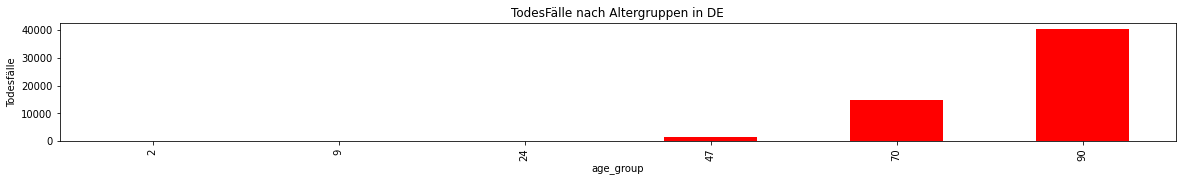

In [110]:
import matplotlib.pyplot as plt
age_group =df.groupby(['age_group']).sum()
deaths_age_group=age_group['deaths']
fig=plt.figure(figsize=[20,10])
ax=fig.add_subplot(4,1,1)
ax.set_ylabel('Todesfälle')
ax.set_title('TodesFälle nach Altergruppen in DE')
deaths_age_group.plot(kind='bar',color='red')

In [111]:
cov_age = df.groupby(['age_group']).sum().reset_index()
cov_age["death_percentage"] = round(cov_age["deaths"]/cov_age["cases"]* 100,1)
cov_age

,age_group,cases,deaths,recovered,density_county,density_state,geschlecht_org,datum,death_percentage
0,2,55223,4,26695,28301168,13932896,13710,42956257996800,0.0
1,9,380245,3,83262,92200249,44698429,43550,133930913788800,0.0
2,24,6566504,55,411117,484534493,227525066,198309,661483489737600,0.0
3,47,12300314,1644,578880,600376847,296222362,265827,933964271596800,0.0
4,70,2396216,14840,235545,242916937,123333769,122442,402860588947200,0.6
5,90,2090260,40577,147003,179640177,90934983,60363,301824364060800,1.9


<AxesSubplot:title={'center':'age_group vs deaths / recovered'}, xlabel='age_group'>

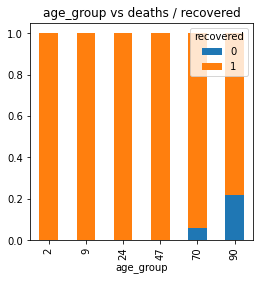

In [112]:
gender=pd.crosstab(df['age_group'],df['recovered'])
gender.div(gender.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True, title='age_group vs deaths / recovered', figsize=(4,4))

In [113]:
df.head(1)

,state,county,age_group,gender,date,cases,deaths,recovered,density_county,density_state,geschlecht_org,datum
0,Baden-Wuerttemberg,LK Alb-Donau-Kreis,2,F,2020-11-15,1,0,1,1358,311,0,1605398400


In [114]:
df

,state,county,age_group,gender,date,cases,deaths,recovered,density_county,density_state,geschlecht_org,datum
0,Baden-Wuerttemberg,LK Alb-Donau-Kreis,2,F,2020-11-15,1,0,1,1358,311,0,1605398400
1,Baden-Wuerttemberg,LK Alb-Donau-Kreis,2,F,2020-11-17,1,0,1,1358,311,0,1605571200
2,Baden-Wuerttemberg,LK Alb-Donau-Kreis,2,F,2020-11-18,1,0,1,1358,311,0,1605657600
3,Baden-Wuerttemberg,LK Alb-Donau-Kreis,2,F,2020-11-19,1,0,1,1358,311,0,1605744000
4,Baden-Wuerttemberg,LK Alb-Donau-Kreis,2,F,2020-11-25,1,0,1,1358,311,0,1606262400
...,...,...,...,...,...,...,...,...,...,...,...,...
1539620,Thueringen,SK Weimar,90,M,2021-02-03,3,0,1,772,132,1,1612310400
1539621,Thueringen,SK Weimar,90,M,2021-02-03,3,0,1,772,132,1,1612310400
1539622,Thueringen,SK Weimar,90,M,2021-02-05,1,0,1,772,132,1,1612483200
1539623,Thueringen,SK Weimar,90,M,2021-02-11,1,0,1,772,132,1,1613001600


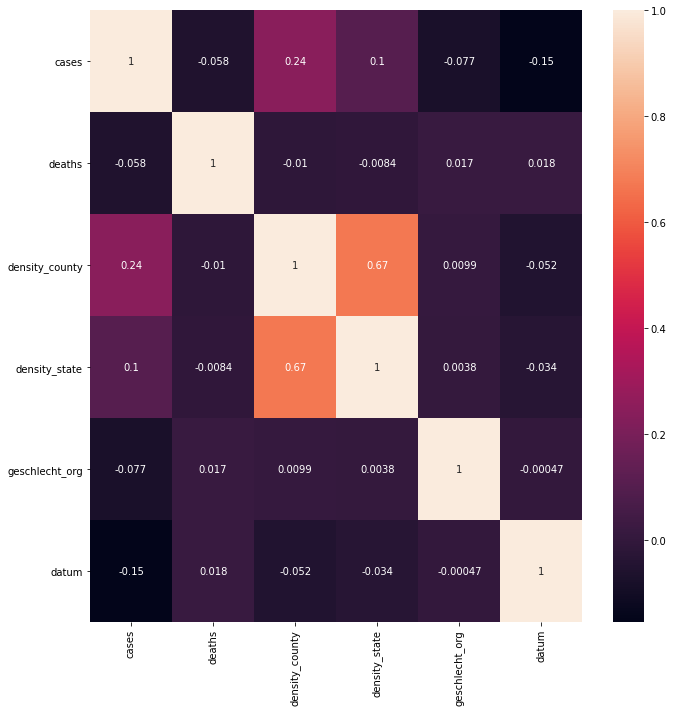

<Figure size 432x288 with 0 Axes>

In [115]:
corr = df.drop(['state','county','date','age_group','gender','recovered'], axis=1).corr()
# Plot heatmap of correlation matrix
plt.figure(figsize=(10,10))
sns.heatmap(corr, annot=True)
plt.yticks(rotation=0); plt.xticks(rotation=90)  # fix ticklabel directions
plt.tight_layout()  # fits plot area to the plot, "tightly"
plt.show()  # show the plot
plt.clf()

In [116]:
df.isnull().sum()

state             0
county            0
age_group         0
gender            0
date              0
cases             0
deaths            0
recovered         0
density_county    0
density_state     0
geschlecht_org    0
datum             0
dtype: int64

In [117]:
df.head(4)

,state,county,age_group,gender,date,cases,deaths,recovered,density_county,density_state,geschlecht_org,datum
0,Baden-Wuerttemberg,LK Alb-Donau-Kreis,2,F,2020-11-15,1,0,1,1358,311,0,1605398400
1,Baden-Wuerttemberg,LK Alb-Donau-Kreis,2,F,2020-11-17,1,0,1,1358,311,0,1605571200
2,Baden-Wuerttemberg,LK Alb-Donau-Kreis,2,F,2020-11-18,1,0,1,1358,311,0,1605657600
3,Baden-Wuerttemberg,LK Alb-Donau-Kreis,2,F,2020-11-19,1,0,1,1358,311,0,1605744000


# Ausführung des RandomForestClassifier-Algorithmus auf dem Covid-19-Datensatz 

In [118]:
y = df.deaths
X = df.drop(['deaths'],axis=1)

In [119]:
y.sum()

57123

In [120]:
X_train_input, X_test_input, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [121]:
X_train_input.head(4)

,state,county,age_group,gender,date,cases,recovered,density_county,density_state,geschlecht_org,datum
1122545,Nordrhein-Westfalen,SK Koeln,90,F,2021-01-20,14,1,2686,526,0,1611100800
1365100,Sachsen,LK Zwickau,90,M,2021-01-12,21,1,332,221,1,1610409600
917322,Nordrhein-Westfalen,LK Maerkischer Kreis,47,F,2021-02-03,17,1,387,526,0,1612310400
1318388,Sachsen,LK Mittelsachsen,70,F,2020-12-28,9,0,144,221,0,1609113600


In [122]:
X_test_input.head(4)

,state,county,age_group,gender,date,cases,recovered,density_county,density_state,geschlecht_org,datum
899007,Nordrhein-Westfalen,LK Hochsauerlandkreis,90,M,2021-01-20,4,1,133,526,1,1611100800
1057250,Nordrhein-Westfalen,SK Dortmund,47,M,2021-01-20,20,1,2096,526,1,1611100800
490454,Berlin,SK Berlin Neukoelln,90,F,2020-12-17,35,1,14201,4090,0,1608163200
1307121,Sachsen,LK Meissen,70,M,2020-12-07,24,1,166,221,1,1607299200


In [123]:
df.head(1)

,state,county,age_group,gender,date,cases,deaths,recovered,density_county,density_state,geschlecht_org,datum
0,Baden-Wuerttemberg,LK Alb-Donau-Kreis,2,F,2020-11-15,1,0,1,1358,311,0,1605398400


In [124]:
X_test=X_test_input.drop(['state','county','date','gender','cases', 'recovered'], axis=1)
X_train=X_train_input.drop(['state','county','date','gender','cases', 'recovered'], axis=1)

In [125]:
X_test.head(4)

,age_group,density_county,density_state,geschlecht_org,datum
899007,90,133,526,1,1611100800
1057250,47,2096,526,1,1611100800
490454,90,14201,4090,0,1608163200
1307121,70,166,221,1,1607299200


# die Folgenden Factoren werden untersucht:
    1) Die Ausfürungsdauer (Lernen und Vorhersagen)
    2) Der Speicherbedard (Lernen und Vorhersagen)
    3) Paramenter des untersuchen Algotrithmus 
    

In [126]:
import time
import os
import psutil
 
def get_process_memory():
    process = psutil.Process(os.getpid())
    mem_info = process.memory_info()
    return mem_info.rss

mem_before=get_process_memory()
start=time.time()
rfc = RandomForestClassifier(n_estimators=10).fit(X_train, y_train)
finish=time.time()- start
mem_after= get_process_memory()
print("\n","memory before (Byte): ",mem_before,"\n","memory after (Byte):", mem_after ,"\n", "used_memory (Byte):",mem_after - mem_before,"\n",
        "time (Sekunde):", finish)



 memory before (Byte):  6376673280 
 memory after (Byte): 6078251008 
 used_memory (Byte): -298422272 
 time (Sekunde): 26.589651584625244


In [127]:
import time
import os
import psutil
 
def get_process_memory():
    process = psutil.Process(os.getpid())
    mem_info = process.memory_info()
    return mem_info.rss

mem_before=get_process_memory()
start=time.time()

pred = np.array(rfc.predict(X_test))
pred_train = np.array(rfc.predict(X_train))

finish=time.time()- start
mem_after= get_process_memory()
print("\n","memory before (Byte): ",mem_before,"\n","memory after (Byte):", mem_after ,"\n", "used_memory (Byte):",mem_after - mem_before,"\n",
        "time (Sekunde):", finish)


 memory before (Byte):  6078267392 
 memory after (Byte): 6084644864 
 used_memory (Byte): 6377472 
 time (Sekunde): 4.650110721588135


# Bewertung der Ergebnisse

Accuracy of test_data:  0.9545630502952661
Accuracy of train_data:  0.9692453049142734
*** Evaluation metrics for test dataset ***

Recall Score:  0.10701513067400276
Precision Score:  0.256723312984656
F1 Score:  0.15106062812484833
Accuracy:  0.9545630502952661


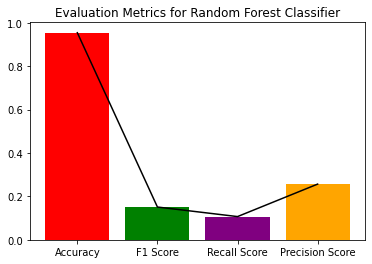


	Table 3

         deaths  pred
899007        0     1
1057250       0     0
490454        0     0
1307121       0     0
251263        0     0
********************** Evaluation metrics for test dataset **************************

('Model roc score:', 55.00000000000001)
              precision    recall  f1-score   support

           0       0.97      0.99      0.98    370367
           1       0.26      0.11      0.15     14540

    accuracy                           0.95    384907
   macro avg       0.61      0.55      0.56    384907
weighted avg       0.94      0.95      0.95    384907

matrix 
 AxesSubplot(0.125,0.125;0.62x0.755)
********************************* feature importances**************************


feature_importances:  
 datum             0.379760
density_county    0.293911
age_group         0.279996
density_state     0.031382
geschlecht_org    0.014951
dtype: float64
('Model roc score:', 55.00000000000001)
******************************** confusion matrix ************

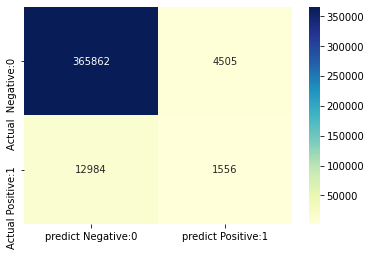

,Pred 0(recovered),Pred 1(deaths)
True 0(recovered),TN = 365862 (TNR = 98.78%),FP = 4505 (FPR = 1.22%)
True 1(deaths),FN = 12984 (FNR = 89.30%),TP = 1556 (TPR = 10.70%)


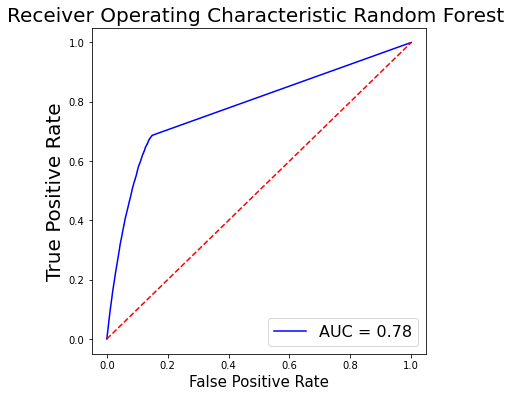

In [128]:

print('Accuracy of test_data: ', accuracy_score(y_test, pred))
print('Accuracy of train_data: ', accuracy_score(y_train, pred_train))

recall = rs(y_test,pred)
precision = ps(y_test,pred)
f1 = fs(y_test,pred)
ma = rfc.score(X_test,y_test)
print('*** Evaluation metrics for test dataset ***\n')
print('Recall Score: ',recall)
print('Precision Score: ',precision)
print('F1 Score: ',f1)
print('Accuracy: ',ma)
plt.bar(['Accuracy','F1 Score','Recall Score','Precision Score'],[ma,f1,recall,precision],color=['red','green','purple','orange'])
plt.plot([ma,f1,recall,precision],color='black')
plt.title('Evaluation Metrics for Random Forest Classifier')
plt.show()
a = pd.DataFrame(y_test)
a['pred']= rfc.predict(X_test)
print('\n\tTable 3\n')
print(a.head())

def conf_matrix(y_test,pred):
    ((tn, fp), (fn, tp)) =metrics.confusion_matrix(y_test, pred)
    ((tnr,fpr),(fnr,tpr))= normalize(metrics.confusion_matrix(y_test, pred), axis=1, norm='l1')
    return pd.DataFrame([[f'TN = {tn} (TNR = {tnr:1.2%})', 
                                f'FP = {fp} (FPR = {fpr:1.2%})'], 
                         [f'FN = {fn} (FNR = {fnr:1.2%})', 
                                f'TP = {tp} (TPR = {tpr:1.2%})']],
            index=['True 0(recovered)', 'True 1(deaths)'], 
            columns=['Pred 0(recovered)', 
                            'Pred 1(deaths)'])

print('********************** Evaluation metrics for test dataset **************************\n')
print(('Model roc score:',100*roc_auc_score(y_test,pred).round(2)))
print(classification_report(y_test, pred))
cnf_matrix=confusion_matrix(y_test, pred)


cm_matrix = pd.DataFrame(data=cnf_matrix, columns=['predict Negative:0', 'predict Positive:1'], 
                            index=['Actual  Negative:0', 'Actual Positive:1'])
print('matrix \n',sns.heatmap(cm_matrix, annot=True, fmt='d', cmap='YlGnBu'))
feature_scores = pd.Series(rfc.feature_importances_, index=X_train.columns).sort_values(ascending=False)
print('********************************* feature importances**************************\n\n')
print('feature_importances:  \n',feature_scores)

print(('Model roc score:',100*roc_auc_score(y_test,pred).round(2)))

print('******************************** confusion matrix *****************************\n\n')
plt.show()
fig, ax = plt.subplots(figsize = (6,6))
probs = rfc.predict_proba(X_test)
preds = probs[:,1]
fprrfc, tprrfc, thresholdrfc = metrics.roc_curve(y_test, preds)
roc_aucrfc = metrics.auc(fprrfc, tprrfc)

ax.plot(fprrfc, tprrfc, 'b', label = 'AUC = %0.2f' % roc_aucrfc)
ax.plot([0, 1], [0, 1],'r--')
ax.set_title('Receiver Operating Characteristic Random Forest ',fontsize=20)
ax.set_ylabel('True Positive Rate',fontsize=20)
ax.set_xlabel('False Positive Rate',fontsize=15)
ax.legend(loc = 'lower right', prop={'size': 16})
plt.subplots_adjust(wspace=1)
conf_matrix(y_test,pred)

# Die Ergebnisse:
    1) RandomForestClassifier hat die Minderheitsklasse 
      (Anzahl der gestorbenen Erkrankten nicht gut vorhergesagt) (Siehe Confusion Matrix)
    2) Die Gründer dafür:
        a) Der untersuchten Trainingsdatensatz ist Imbalnced (Anzahl der genesenen Fällen ist:
                                                              Anzahl der Todesfällen ist:       )

# Die Lösungen:
    1) Nutzung der Resampling-Methode 
       from imblearn.under_sampling import RandomUnderSampler, NearMiss
       from imblearn.over_sampling import RandomOverSampler, SMOTE
    2) Nutzung von Kfold-Methode
       from sklearn.model_selection import KFold, StratifiedKFold
    3) Änderung der Parameter des Algorithmus (Nutzung der Funktion GridSearchCV, 
                                               um der Parameter des bestes Modul zu identifizieren)
       from sklearn.model_selection import GridSearchCV
    4) Verwendung andere Algorithmus
    

# RandomUnderSampler

In [129]:
rus =RandomUnderSampler()
rfc = RandomForestClassifier()
y = df.deaths
X = df.drop(['deaths'],axis=1)
X_train_input, X_test_input, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)
X_test=X_test_input.drop(['state','county','date','gender','cases', 'recovered'], axis=1)
X_train=X_train_input.drop(['state','county','date','gender','cases', 'recovered'], axis=1)

In [130]:
import time
import os
import psutil
 
def get_process_memory():
    process = psutil.Process(os.getpid())
    mem_info = process.memory_info()
    return mem_info.rss

mem_before=get_process_memory()
start=time.time()
X_train_rus, y_train_rus = rus.fit_sample(X_train, y_train)
finish=time.time()- start
mem_after= get_process_memory()
print("\n","memory before (Byte): ",mem_before,"\n","memory after (Byte):", mem_after ,"\n", "used_memory (Byte):",mem_after - mem_before,"\n",
        "time (Sekunde):", finish)


 memory before (Byte):  6207258624 
 memory after (Byte): 6211518464 
 used_memory (Byte): 4259840 
 time (Sekunde): 0.42296528816223145


In [131]:
import time
import os
import psutil
 
def get_process_memory():
    process = psutil.Process(os.getpid())
    mem_info = process.memory_info()
    return mem_info.rss

mem_before=get_process_memory()
start=time.time()
rfc.fit(X_train_rus, y_train_rus)
finish=time.time()- start
mem_after= get_process_memory()
print("\n","memory before (Byte): ",mem_before,"\n","memory after (Byte):", mem_after ,"\n", "used_memory (Byte):",mem_after - mem_before,"\n",
        "time (Sekunde):", finish)


 memory before (Byte):  6211518464 
 memory after (Byte): 6409908224 
 used_memory (Byte): 198389760 
 time (Sekunde): 7.977280855178833


Accuracy of test_data:  0.8001906954147365
Accuracy of train_data:  0.9481483221003687
Recall: 0.859
********************** Evaluation metrics for test dataset **************************

('Model roc score:', 83.0)
              precision    recall  f1-score   support

           0       0.99      0.80      0.88    370367
           1       0.14      0.86      0.25     14540

    accuracy                           0.80    384907
   macro avg       0.57      0.83      0.57    384907
weighted avg       0.96      0.80      0.86    384907

Recall Score:  0.8592847317744154
Precision Score:  0.14302394798296625
F1 Score:  0.24523043102771452
Accuracy:  0.8001906954147365


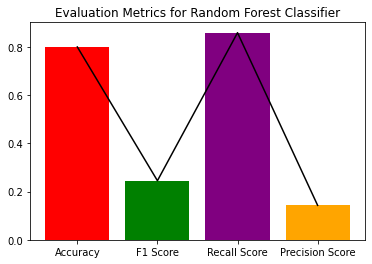


	Table 3

         deaths  pred
899007        0     1
1057250       0     0
490454        0     1
1307121       0     1
251263        0     0
matrix 
 AxesSubplot(0.125,0.125;0.62x0.755)
********************************* feature importances**************************


feature_importances:  
 age_group         0.628652
datum             0.191116
density_county    0.147129
density_state     0.027008
geschlecht_org    0.006094
dtype: float64
******************************** confusion matrix *****************************




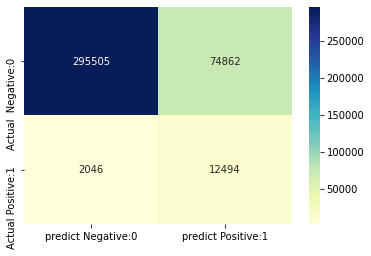

,Pred 0(recovered),Pred 1(deaths)
True 0(recovered),TN = 295505 (TNR = 79.79%),FP = 74862 (FPR = 20.21%)
True 1(deaths),FN = 2046 (FNR = 14.07%),TP = 12494 (TPR = 85.93%)


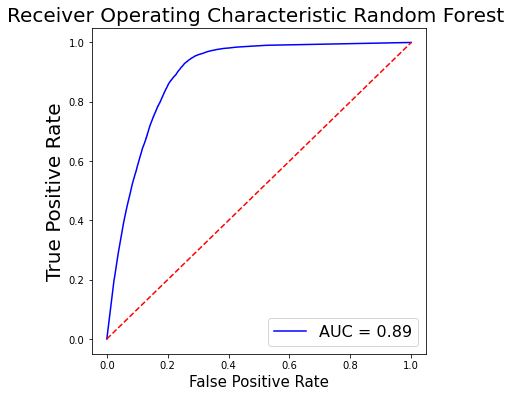

In [132]:
pred = np.array(rfc.predict(X_test))
pred_train = np.array(rfc.predict(X_train_rus))
print('Accuracy of test_data: ', accuracy_score(y_test, pred))
print('Accuracy of train_data: ', accuracy_score(y_train_rus, pred_train))
print("Recall: {0:.3f}".format(recall_score(y_test, pred)))

print('********************** Evaluation metrics for test dataset **************************\n')
print(('Model roc score:',100*roc_auc_score(y_test,pred).round(2)))
print(classification_report(y_test, pred))
cnf_matrix=confusion_matrix(y_test, pred)

pred = np.array(rfc.predict(X_test))
recall = rs(y_test,pred)
precision = ps(y_test,pred)
f1 = fs(y_test,pred)
ma = rfc.score(X_test,y_test)
print('Recall Score: ',recall)
print('Precision Score: ',precision)
print('F1 Score: ',f1)
print('Accuracy: ',ma)
plt.bar(['Accuracy','F1 Score','Recall Score','Precision Score'],[ma,f1,recall,precision],color=['red','green','purple','orange'])
plt.plot([ma,f1,recall,precision],color='black')
plt.title('Evaluation Metrics for Random Forest Classifier')
plt.show()
a = pd.DataFrame(y_test)
a['pred']= rfc.predict(X_test)
print('\n\tTable 3\n')
print(a.head())

def conf_matrix(y_test,pred):
    ((tn, fp), (fn, tp)) =metrics.confusion_matrix(y_test, pred)
    ((tnr,fpr),(fnr,tpr))= normalize(metrics.confusion_matrix(y_test, pred), axis=1, norm='l1')
    return pd.DataFrame([[f'TN = {tn} (TNR = {tnr:1.2%})', 
                                f'FP = {fp} (FPR = {fpr:1.2%})'], 
                         [f'FN = {fn} (FNR = {fnr:1.2%})', 
                                f'TP = {tp} (TPR = {tpr:1.2%})']],
            index=['True 0(recovered)', 'True 1(deaths)'], 
            columns=['Pred 0(recovered)', 
                            'Pred 1(deaths)'])


cm_matrix = pd.DataFrame(data=cnf_matrix, columns=['predict Negative:0', 'predict Positive:1'], 
                            index=['Actual  Negative:0', 'Actual Positive:1'])
print('matrix \n',sns.heatmap(cm_matrix, annot=True, fmt='d', cmap='YlGnBu'))
feature_scores = pd.Series(rfc.feature_importances_, index=X_train.columns).sort_values(ascending=False)
print('********************************* feature importances**************************\n\n')
print('feature_importances:  \n',feature_scores)
print('******************************** confusion matrix *****************************\n\n')
plt.show()

fig, ax = plt.subplots(figsize = (6,6))
probs = rfc.predict_proba(X_test)
preds = probs[:,1]
fprrfc, tprrfc, thresholdrfc = metrics.roc_curve(y_test, preds)
roc_aucrfc = metrics.auc(fprrfc, tprrfc)
ax.plot(fprrfc, tprrfc, 'b', label = 'AUC = %0.2f' % roc_aucrfc)
ax.plot([0, 1], [0, 1],'r--')
ax.set_title('Receiver Operating Characteristic Random Forest ',fontsize=20)
ax.set_ylabel('True Positive Rate',fontsize=20)
ax.set_xlabel('False Positive Rate',fontsize=15)
ax.legend(loc = 'lower right', prop={'size': 16})
plt.subplots_adjust(wspace=1)

conf_matrix(y_test,pred)

# Bewerung der Ergebnisse mit RandomUnderSampling:
    1) Minderheitsklasse (Anzahl der Todesfälle) wird mit 89.68 % richtig (True Positve) vorhergesagt
    2) False Negative Rate ist 10.32 % 
    

# NearMiss

In [133]:
near =NearMiss()
rfc = RandomForestClassifier()
y = df.deaths
X = df.drop(['deaths'],axis=1)
X_train_input, X_test_input, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)
X_test=X_test_input.drop(['state','county','date','gender','cases', 'recovered'], axis=1)
X_train=X_train_input.drop(['state','county','date','gender','cases', 'recovered'], axis=1)

In [134]:
import time
import os
import psutil
 
def get_process_memory():
    process = psutil.Process(os.getpid())
    mem_info = process.memory_info()
    return mem_info.rss

mem_before=get_process_memory()
start=time.time()
X_train_near, y_train_near = near.fit_sample(X_train, y_train)
finish=time.time()- start
mem_after= get_process_memory()
print("\n","memory before (Byte): ",mem_before,"\n","memory after (Byte):", mem_after ,"\n", "used_memory (Byte):",mem_after - mem_before,"\n",
        "time (Sekunde):", finish)


 memory before (Byte):  6194663424 
 memory after (Byte): 6206111744 
 used_memory (Byte): 11448320 
 time (Sekunde): 13.355140924453735


In [135]:
import time
import os
import psutil
 
def get_process_memory():
    process = psutil.Process(os.getpid())
    mem_info = process.memory_info()
    return mem_info.rss

mem_before=get_process_memory()
start=time.time()
rfc.fit(X_train_near, y_train_near)
finish=time.time()- start
mem_after= get_process_memory()
print("\n","memory before (Byte): ",mem_before,"\n","memory after (Byte):", mem_after ,"\n", "used_memory (Byte):",mem_after - mem_before,"\n",
        "time (Sekunde):", finish)


 memory before (Byte):  6206111744 
 memory after (Byte): 6368215040 
 used_memory (Byte): 162103296 
 time (Sekunde): 7.675121784210205


Accuracy of test_data:  0.07113926221139133
Accuracy of train_data:  0.8198342061385999
Recall: 0.766
********************** Evaluation metrics for test dataset **************************

('Model roc score:', 40.0)
              precision    recall  f1-score   support

           0       0.83      0.04      0.08    370367
           1       0.03      0.77      0.06     14540

    accuracy                           0.07    384907
   macro avg       0.43      0.40      0.07    384907
weighted avg       0.80      0.07      0.08    384907

Recall Score:  0.7656808803301238
Precision Score:  0.03048040936232892
F1 Score:  0.05862698168203039
Accuracy:  0.07113926221139133


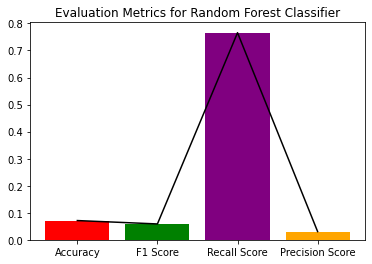


	Table 3

         deaths  pred
899007        0     1
1057250       0     1
490454        0     0
1307121       0     1
251263        0     1
matrix 
 AxesSubplot(0.125,0.125;0.62x0.755)
********************************* feature importances**************************


feature_importances:  
 datum             0.435582
density_county    0.315565
density_state     0.129885
geschlecht_org    0.069460
age_group         0.049508
dtype: float64
******************************** confusion matrix *****************************




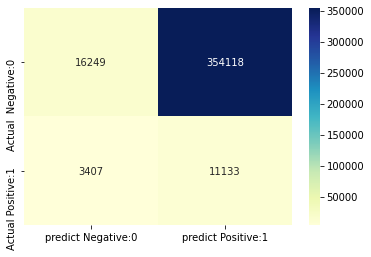

,Pred 0(recovered),Pred 1(deaths)
True 0(recovered),TN = 16249 (TNR = 4.39%),FP = 354118 (FPR = 95.61%)
True 1(deaths),FN = 3407 (FNR = 23.43%),TP = 11133 (TPR = 76.57%)


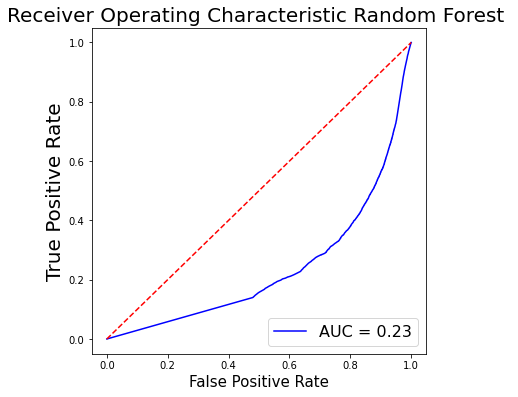

In [136]:
pred = np.array(rfc.predict(X_test))
pred_train = np.array(rfc.predict(X_train_near))
print('Accuracy of test_data: ', accuracy_score(y_test, pred))
print('Accuracy of train_data: ', accuracy_score(y_train_near, pred_train))
print("Recall: {0:.3f}".format(recall_score(y_test, pred)))

print('********************** Evaluation metrics for test dataset **************************\n')
print(('Model roc score:',100*roc_auc_score(y_test,pred).round(2)))
print(classification_report(y_test, pred))
cnf_matrix=confusion_matrix(y_test, pred)

pred = np.array(rfc.predict(X_test))
recall = rs(y_test,pred)
precision = ps(y_test,pred)
f1 = fs(y_test,pred)
ma = rfc.score(X_test,y_test)
print('Recall Score: ',recall)
print('Precision Score: ',precision)
print('F1 Score: ',f1)
print('Accuracy: ',ma)
plt.bar(['Accuracy','F1 Score','Recall Score','Precision Score'],[ma,f1,recall,precision],color=['red','green','purple','orange'])
plt.plot([ma,f1,recall,precision],color='black')
plt.title('Evaluation Metrics for Random Forest Classifier')
plt.show()
a = pd.DataFrame(y_test)
a['pred']= rfc.predict(X_test)
print('\n\tTable 3\n')
print(a.head())

def conf_matrix(y_test,pred):
    ((tn, fp), (fn, tp)) =metrics.confusion_matrix(y_test, pred)
    ((tnr,fpr),(fnr,tpr))= normalize(metrics.confusion_matrix(y_test, pred), axis=1, norm='l1')
    return pd.DataFrame([[f'TN = {tn} (TNR = {tnr:1.2%})', 
                                f'FP = {fp} (FPR = {fpr:1.2%})'], 
                         [f'FN = {fn} (FNR = {fnr:1.2%})', 
                                f'TP = {tp} (TPR = {tpr:1.2%})']],
            index=['True 0(recovered)', 'True 1(deaths)'], 
            columns=['Pred 0(recovered)', 
                            'Pred 1(deaths)'])


cm_matrix = pd.DataFrame(data=cnf_matrix, columns=['predict Negative:0', 'predict Positive:1'], 
                            index=['Actual  Negative:0', 'Actual Positive:1'])
print('matrix \n',sns.heatmap(cm_matrix, annot=True, fmt='d', cmap='YlGnBu'))
feature_scores = pd.Series(rfc.feature_importances_, index=X_train.columns).sort_values(ascending=False)
print('********************************* feature importances**************************\n\n')
print('feature_importances:  \n',feature_scores)
print('******************************** confusion matrix *****************************\n\n')
plt.show()

fig, ax = plt.subplots(figsize = (6,6))
probs = rfc.predict_proba(X_test)
preds = probs[:,1]
fprrfc, tprrfc, thresholdrfc = metrics.roc_curve(y_test, preds)
roc_aucrfc = metrics.auc(fprrfc, tprrfc)
ax.plot(fprrfc, tprrfc, 'b', label = 'AUC = %0.2f' % roc_aucrfc)
ax.plot([0, 1], [0, 1],'r--')
ax.set_title('Receiver Operating Characteristic Random Forest ',fontsize=20)
ax.set_ylabel('True Positive Rate',fontsize=20)
ax.set_xlabel('False Positive Rate',fontsize=15)
ax.legend(loc = 'lower right', prop={'size': 16})
plt.subplots_adjust(wspace=1)

conf_matrix(y_test,pred)

# Bewertung der Ergebnisse mit NearMiss:
    

# RandomOverSampler

In [137]:
ros =RandomOverSampler()
rfc = RandomForestClassifier()
y = df.deaths
X = df.drop(['deaths'],axis=1)
X_train_input, X_test_input, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)
X_test=X_test_input.drop(['state','county','date','gender','cases', 'recovered'], axis=1)
X_train=X_train_input.drop(['state','county','date','gender','cases', 'recovered'], axis=1)

In [138]:
import time
import os
import psutil
 
def get_process_memory():
    process = psutil.Process(os.getpid())
    mem_info = process.memory_info()
    return mem_info.rss
mem_before=get_process_memory()
start=time.time()
X_train_ros, y_train_ros = ros.fit_sample(X_train, y_train)
finish=time.time() - start
mem_after=get_process_memory()
print("\n","memory before (Byte): ",mem_before,"\n","memory after (Byte):", mem_after ,"\n", "used_memory (Byte):",mem_after - mem_before,"\n",
        "time (Sekunde):", finish)


 memory before (Byte):  6191501312 
 memory after (Byte): 6191570944 
 used_memory (Byte): 69632 
 time (Sekunde): 1.0336477756500244


In [139]:
import time
import os
import psutil

def get_process_memory():
    process = psutil.Process(os.getpid())
    mem_info = process.memory_info()
    return mem_info.rss

mem_before = get_process_memory()
start = time.time()
rfc.fit(X_train_ros, y_train_ros)
finish = time.time() - start
mem_after = get_process_memory()
print("\n","memory before (Byte): ",mem_before,"\n","memory after (Byte):" ,mem_after ,"\n", "used_memory (Byte):",mem_after - mem_before,"\n",
        "time (Sekunde):", finish)


 memory before (Byte):  6191570944 
 memory after (Byte): 6887624704 
 used_memory (Byte): 696053760 
 time (Sekunde): 616.1821553707123


Accuracy of test_data:  0.8735356852434484
Accuracy of train_data:  0.9434484122880765
Recall: 0.558
********************** Evaluation metrics for test dataset **************************

('Model roc score:', 72.0)
              precision    recall  f1-score   support

           0       0.98      0.89      0.93    370367
           1       0.16      0.56      0.25     14540

    accuracy                           0.87    384907
   macro avg       0.57      0.72      0.59    384907
weighted avg       0.95      0.87      0.91    384907

Recall Score:  0.5583906464924346
Precision Score:  0.1611712158808933
F1 Score:  0.25014249403065547
Accuracy:  0.8735356852434484


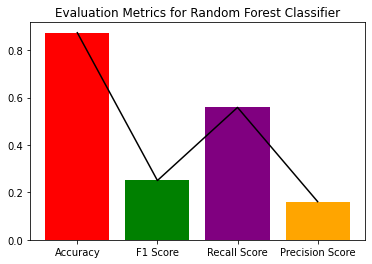


	Table 3

         deaths  pred
899007        0     1
1057250       0     0
490454        0     1
1307121       0     1
251263        0     0
matrix 
 AxesSubplot(0.125,0.125;0.62x0.755)
********************************* feature importances**************************


feature_importances:  
 age_group         0.697453
datum             0.162479
density_county    0.117219
density_state     0.016789
geschlecht_org    0.006059
dtype: float64
******************************** confusion matrix *****************************




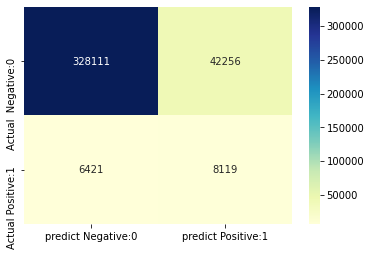

,Pred 0(recovered),Pred 1(deaths)
True 0(recovered),TN = 328111 (TNR = 88.59%),FP = 42256 (FPR = 11.41%)
True 1(deaths),FN = 6421 (FNR = 44.16%),TP = 8119 (TPR = 55.84%)


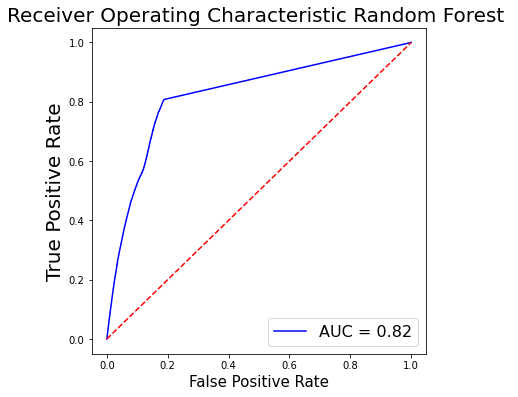

In [140]:
pred = np.array(rfc.predict(X_test))
pred_train = np.array(rfc.predict(X_train_ros))
print('Accuracy of test_data: ', accuracy_score(y_test, pred))
print('Accuracy of train_data: ', accuracy_score(y_train_ros, pred_train))
print("Recall: {0:.3f}".format(recall_score(y_test, pred)))
print('********************** Evaluation metrics for test dataset **************************\n')
print(('Model roc score:',100*roc_auc_score(y_test,pred).round(2)))
print(classification_report(y_test, pred))
cnf_matrix=confusion_matrix(y_test, pred)

pred = np.array(rfc.predict(X_test))
recall = rs(y_test,pred)
precision = ps(y_test,pred)
f1 = fs(y_test,pred)
ma = rfc.score(X_test,y_test)
print('Recall Score: ',recall)
print('Precision Score: ',precision)
print('F1 Score: ',f1)
print('Accuracy: ',ma)
plt.bar(['Accuracy','F1 Score','Recall Score','Precision Score'],[ma,f1,recall,precision],color=['red','green','purple','orange'])
plt.plot([ma,f1,recall,precision],color='black')
plt.title('Evaluation Metrics for Random Forest Classifier')
plt.show()
a = pd.DataFrame(y_test)
a['pred']= rfc.predict(X_test)
print('\n\tTable 3\n')
print(a.head())

def conf_matrix(y_test,pred):
    ((tn, fp), (fn, tp)) =metrics.confusion_matrix(y_test, pred)
    ((tnr,fpr),(fnr,tpr))= normalize(metrics.confusion_matrix(y_test, pred), axis=1, norm='l1')
    return pd.DataFrame([[f'TN = {tn} (TNR = {tnr:1.2%})', 
                                f'FP = {fp} (FPR = {fpr:1.2%})'], 
                         [f'FN = {fn} (FNR = {fnr:1.2%})', 
                                f'TP = {tp} (TPR = {tpr:1.2%})']],
            index=['True 0(recovered)', 'True 1(deaths)'], 
            columns=['Pred 0(recovered)', 
                            'Pred 1(deaths)'])


cm_matrix = pd.DataFrame(data=cnf_matrix, columns=['predict Negative:0', 'predict Positive:1'], 
                            index=['Actual  Negative:0', 'Actual Positive:1'])
print('matrix \n',sns.heatmap(cm_matrix, annot=True, fmt='d', cmap='YlGnBu'))
feature_scores = pd.Series(rfc.feature_importances_, index=X_train.columns).sort_values(ascending=False)
print('********************************* feature importances**************************\n\n')
print('feature_importances:  \n',feature_scores)
print('******************************** confusion matrix *****************************\n\n')
plt.show()

fig, ax = plt.subplots(figsize = (6,6))
probs = rfc.predict_proba(X_test)
preds = probs[:,1]
fprrfc, tprrfc, thresholdrfc = metrics.roc_curve(y_test, preds)
roc_aucrfc = metrics.auc(fprrfc, tprrfc)
ax.plot(fprrfc, tprrfc, 'b', label = 'AUC = %0.2f' % roc_aucrfc)
ax.plot([0, 1], [0, 1],'r--')
ax.set_title('Receiver Operating Characteristic Random Forest ',fontsize=20)
ax.set_ylabel('True Positive Rate',fontsize=20)
ax.set_xlabel('False Positive Rate',fontsize=15)
ax.legend(loc = 'lower right', prop={'size': 16})
plt.subplots_adjust(wspace=1)

conf_matrix(y_test,pred)

# SMOTE

In [141]:
somte =SMOTE(random_state=42)
rfc = RandomForestClassifier()
y = df.deaths
X = df.drop(['deaths'],axis=1)
X_train_input, X_test_input, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)
X_test=X_test_input.drop(['state','county','date','gender','cases', 'recovered'], axis=1)
X_train=X_train_input.drop(['state','county','date','gender','cases', 'recovered'], axis=1)

In [142]:
import time
import os
import psutil
 
def get_process_memory():
    process = psutil.Process(os.getpid())
    mem_info = process.memory_info()
    return mem_info.rss
mem_before=get_process_memory()
start=time.time()
X_train_som, y_train_som = somte.fit_sample(X_train, y_train)
finish=time.time()- start
mem_after= get_process_memory()
print("\n","memory before (Byte): ",mem_before,"\n","memory after (Byte):", mem_after ,"\n", "used_memory (Byte):",mem_after - mem_before,"\n",
        "time (Sekunde):", finish)


 memory before (Byte):  6182096896 
 memory after (Byte): 6167990272 
 used_memory (Byte): -14106624 
 time (Sekunde): 2.013887882232666


In [143]:
import time
import os
import psutil
 
def get_process_memory():
    process = psutil.Process(os.getpid())
    mem_info = process.memory_info()
    return mem_info.rss

mem_before=get_process_memory()
start=time.time()
rfc.fit(X_train_som, y_train_som)
finish=time.time()- start
mem_after= get_process_memory()
print("\n","memory before (Byte): ",mem_before,"\n","memory after (Byte):", mem_after ,"\n", "used_memory (Byte):",mem_after - mem_before,"\n",
        "time (Sekunde):", finish)


 memory before (Byte):  6167990272 
 memory after (Byte): 6600077312 
 used_memory (Byte): 432087040 
 time (Sekunde): 655.8463068008423


Accuracy of test_data:  0.9052082710888604
Accuracy of train_data:  0.9562108017461909
Recall: 0.446
********************** Evaluation metrics for test dataset **************************

('Model roc score:', 68.0)
              precision    recall  f1-score   support

           0       0.98      0.92      0.95    370367
           1       0.19      0.45      0.26     14540

    accuracy                           0.91    384907
   macro avg       0.58      0.68      0.61    384907
weighted avg       0.95      0.91      0.92    384907

Recall Score:  0.44621733149931225
Precision Score:  0.1857854647500143
F1 Score:  0.26234280862075937
Accuracy:  0.9052082710888604


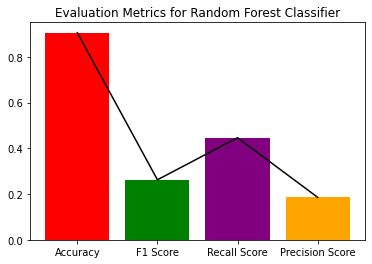


	Table 3

         deaths  pred
899007        0     1
1057250       0     0
490454        0     1
1307121       0     0
251263        0     0
matrix 
 AxesSubplot(0.125,0.125;0.62x0.755)
********************************* feature importances**************************


feature_importances:  
 age_group         0.739982
density_county    0.109622
datum             0.095298
density_state     0.039438
geschlecht_org    0.015660
dtype: float64
******************************** confusion matrix *****************************




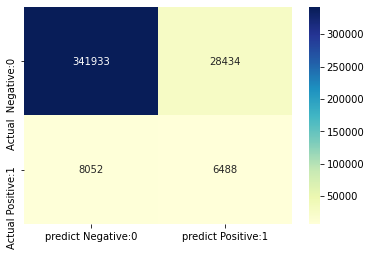

,Pred 0(recovered),Pred 1(deaths)
True 0(recovered),TN = 341933 (TNR = 92.32%),FP = 28434 (FPR = 7.68%)
True 1(deaths),FN = 8052 (FNR = 55.38%),TP = 6488 (TPR = 44.62%)


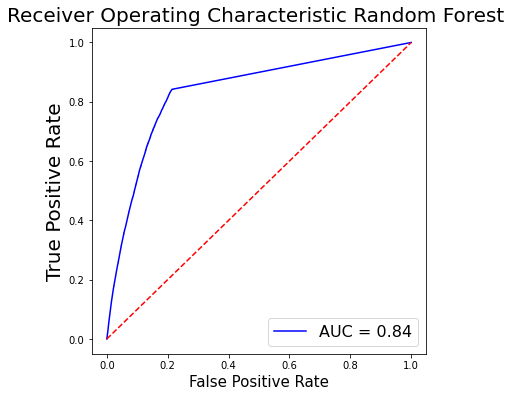

In [144]:
pred = np.array(rfc.predict(X_test))
pred_train = np.array(rfc.predict(X_train_som))
print('Accuracy of test_data: ', accuracy_score(y_test, pred))
print('Accuracy of train_data: ', accuracy_score(y_train_som, pred_train))
print("Recall: {0:.3f}".format(recall_score(y_test, pred)))

print('********************** Evaluation metrics for test dataset **************************\n')
print(('Model roc score:',100*roc_auc_score(y_test,pred).round(2)))
print(classification_report(y_test, pred))
cnf_matrix=confusion_matrix(y_test, pred)

pred = np.array(rfc.predict(X_test))
recall = rs(y_test,pred)
precision = ps(y_test,pred)
f1 = fs(y_test,pred)
ma = rfc.score(X_test,y_test)
print('Recall Score: ',recall)
print('Precision Score: ',precision)
print('F1 Score: ',f1)
print('Accuracy: ',ma)
plt.bar(['Accuracy','F1 Score','Recall Score','Precision Score'],[ma,f1,recall,precision],color=['red','green','purple','orange'])
plt.plot([ma,f1,recall,precision],color='black')
plt.title('Evaluation Metrics for Random Forest Classifier')
plt.show()
a = pd.DataFrame(y_test)
a['pred']= rfc.predict(X_test)
print('\n\tTable 3\n')
print(a.head())

def conf_matrix(y_test,pred):
    ((tn, fp), (fn, tp)) =metrics.confusion_matrix(y_test, pred)
    ((tnr,fpr),(fnr,tpr))= normalize(metrics.confusion_matrix(y_test, pred), axis=1, norm='l1')
    return pd.DataFrame([[f'TN = {tn} (TNR = {tnr:1.2%})', 
                                f'FP = {fp} (FPR = {fpr:1.2%})'], 
                         [f'FN = {fn} (FNR = {fnr:1.2%})', 
                                f'TP = {tp} (TPR = {tpr:1.2%})']],
            index=['True 0(recovered)', 'True 1(deaths)'], 
            columns=['Pred 0(recovered)', 
                            'Pred 1(deaths)'])


cm_matrix = pd.DataFrame(data=cnf_matrix, columns=['predict Negative:0', 'predict Positive:1'], 
                            index=['Actual  Negative:0', 'Actual Positive:1'])
print('matrix \n',sns.heatmap(cm_matrix, annot=True, fmt='d', cmap='YlGnBu'))
feature_scores = pd.Series(rfc.feature_importances_, index=X_train.columns).sort_values(ascending=False)
print('********************************* feature importances**************************\n\n')
print('feature_importances:  \n',feature_scores)
print('******************************** confusion matrix *****************************\n\n')
plt.show()

fig, ax = plt.subplots(figsize = (6,6))
probs = rfc.predict_proba(X_test)
preds = probs[:,1]
fprrfc, tprrfc, thresholdrfc = metrics.roc_curve(y_test, preds)
roc_aucrfc = metrics.auc(fprrfc, tprrfc)
ax.plot(fprrfc, tprrfc, 'b', label = 'AUC = %0.2f' % roc_aucrfc)
ax.plot([0, 1], [0, 1],'r--')
ax.set_title('Receiver Operating Characteristic Random Forest ',fontsize=20)
ax.set_ylabel('True Positive Rate',fontsize=20)
ax.set_xlabel('False Positive Rate',fontsize=15)
ax.legend(loc = 'lower right', prop={'size': 16})
plt.subplots_adjust(wspace=1)

conf_matrix(y_test,pred)

# Nutzung der Funktion GridSearchCV, um der Parameter des bestes Modul zu identifizieren

In [145]:

rfc = RandomForestClassifier()
y = df.deaths
X = df.drop(['deaths'],axis=1)
X_train_input, X_test_input, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)
X_test=X_test_input.drop(['state','county','date','gender','cases', 'recovered'], axis=1)
X_train=X_train_input.drop(['state','county','date','gender','cases', 'recovered'], axis=1)

In [72]:
param_grid = {
        'max_depth': [5, 10, 15],
        'min_samples_split': [10, 20, 30],
        'n_estimators': [10, 20, 30],
        'min_samples_leaf': [5, 10, 15],
        'n_jobs': [4],
        "bootstrap": [True],
        "criterion": ["entropy"]
    }
grid = GridSearchCV(estimator=RandomForestClassifier(random_state=0),
                    param_grid=param_grid,
                    scoring="accuracy",
                    cv=10)   
grid.fit(X_train, y_train)
print(f"Best Score: {grid.best_score_}, Param: {grid.best_params_}")

Best Score: 0.9949199999999999, Param: {'bootstrap': True, 'criterion': 'entropy', 'max_depth': 5, 'min_samples_leaf': 5, 'min_samples_split': 10, 'n_estimators': 10, 'n_jobs': 4}


In [146]:
rfc = RandomForestClassifier(bootstrap= True, criterion= 'entropy', max_depth= 5, 
                             min_samples_leaf= 5, min_samples_split=10, n_estimators= 10, n_jobs=4)

In [147]:
import time
import os
import psutil
 
def get_process_memory():
    process = psutil.Process(os.getpid())
    mem_info = process.memory_info()
    return mem_info.rss

mem_before=get_process_memory()
start=time.time()
X_train_rus, y_train_rus = rus.fit_sample(X_train, y_train)
finish=time.time()- start
mem_after= get_process_memory()
print("\n","memory before (Byte): ",mem_before,"\n","memory after (Byte):", mem_after ,"\n", "used_memory (Byte):",mem_after - mem_before,"\n",
        "time (Sekunde):", finish)


 memory before (Byte):  5660712960 
 memory after (Byte): 5661028352 
 used_memory (Byte): 315392 
 time (Sekunde): 0.4168863296508789


In [148]:
import time
import os
import psutil
 
def get_process_memory():
    process = psutil.Process(os.getpid())
    mem_info = process.memory_info()
    return mem_info.rss

mem_before=get_process_memory()
start=time.time()
rfc.fit(X_train_rus, y_train_rus)
finish=time.time()- start
mem_after= get_process_memory()
print("\n","memory before (Byte): ",mem_before,"\n","memory after (Byte):", mem_after ,"\n", "used_memory (Byte):",mem_after - mem_before,"\n",
        "time (Sekunde):", finish)


 memory before (Byte):  5661032448 
 memory after (Byte): 5668765696 
 used_memory (Byte): 7733248 
 time (Sekunde): 0.22147083282470703


Accuracy of test_data:  0.7502955259322381
Accuracy of train_data:  0.854695535777188
Recall: 0.970
********************** Evaluation metrics for test dataset **************************

('Model roc score:', 86.0)
              precision    recall  f1-score   support

           0       1.00      0.74      0.85    370367
           1       0.13      0.97      0.23     14540

    accuracy                           0.75    384907
   macro avg       0.56      0.86      0.54    384907
weighted avg       0.97      0.75      0.83    384907

Recall Score:  0.9701513067400275
Precision Score:  0.12848749829211642
F1 Score:  0.22692137542730748
Accuracy:  0.7502955259322381


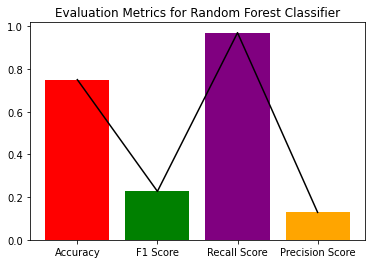


	Table 3

         deaths  pred
899007        0     1
1057250       0     0
490454        0     1
1307121       0     1
251263        0     0
matrix 
 AxesSubplot(0.125,0.125;0.62x0.755)
********************************* feature importances**************************


feature_importances:  
 age_group         0.981805
geschlecht_org    0.006675
datum             0.005123
density_state     0.003466
density_county    0.002931
dtype: float64
******************************** confusion matrix *****************************




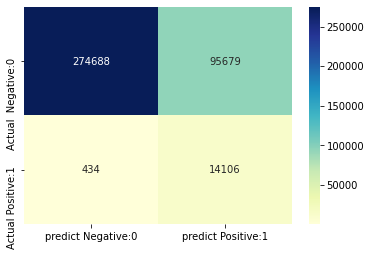

,Pred 0(recovered),Pred 1(deaths)
True 0(recovered),TN = 274688 (TNR = 74.17%),FP = 95679 (FPR = 25.83%)
True 1(deaths),FN = 434 (FNR = 2.98%),TP = 14106 (TPR = 97.02%)


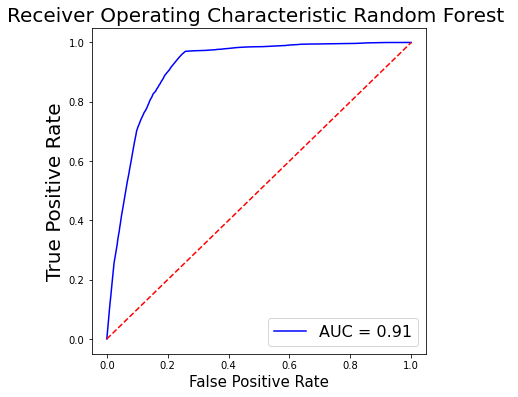

In [149]:
pred = np.array(rfc.predict(X_test))
pred_train = np.array(rfc.predict(X_train_rus))
print('Accuracy of test_data: ', accuracy_score(y_test, pred))
print('Accuracy of train_data: ', accuracy_score(y_train_rus, pred_train))
print("Recall: {0:.3f}".format(recall_score(y_test, pred)))

print('********************** Evaluation metrics for test dataset **************************\n')
print(('Model roc score:',100*roc_auc_score(y_test,pred).round(2)))
print(classification_report(y_test, pred))
cnf_matrix=confusion_matrix(y_test, pred)
pred = np.array(rfc.predict(X_test))
recall = rs(y_test,pred)
precision = ps(y_test,pred)
f1 = fs(y_test,pred)
ma = rfc.score(X_test,y_test)
print('Recall Score: ',recall)
print('Precision Score: ',precision)
print('F1 Score: ',f1)
print('Accuracy: ',ma)
plt.bar(['Accuracy','F1 Score','Recall Score','Precision Score'],[ma,f1,recall,precision],color=['red','green','purple','orange'])
plt.plot([ma,f1,recall,precision],color='black')
plt.title('Evaluation Metrics for Random Forest Classifier')
plt.show()
a = pd.DataFrame(y_test)
a['pred']= rfc.predict(X_test)
print('\n\tTable 3\n')
print(a.head())

def conf_matrix(y_test,pred):
    ((tn, fp), (fn, tp)) =metrics.confusion_matrix(y_test, pred)
    ((tnr,fpr),(fnr,tpr))= normalize(metrics.confusion_matrix(y_test, pred), axis=1, norm='l1')
    return pd.DataFrame([[f'TN = {tn} (TNR = {tnr:1.2%})', 
                                f'FP = {fp} (FPR = {fpr:1.2%})'], 
                         [f'FN = {fn} (FNR = {fnr:1.2%})', 
                                f'TP = {tp} (TPR = {tpr:1.2%})']],
            index=['True 0(recovered)', 'True 1(deaths)'], 
            columns=['Pred 0(recovered)', 
                            'Pred 1(deaths)'])


cm_matrix = pd.DataFrame(data=cnf_matrix, columns=['predict Negative:0', 'predict Positive:1'], 
                            index=['Actual  Negative:0', 'Actual Positive:1'])
print('matrix \n',sns.heatmap(cm_matrix, annot=True, fmt='d', cmap='YlGnBu'))
feature_scores = pd.Series(rfc.feature_importances_, index=X_train.columns).sort_values(ascending=False)
print('********************************* feature importances**************************\n\n')
print('feature_importances:  \n',feature_scores)
print('******************************** confusion matrix *****************************\n\n')
plt.show()

fig, ax = plt.subplots(figsize = (6,6))
probs = rfc.predict_proba(X_test)
preds = probs[:,1]
fprrfc, tprrfc, thresholdrfc = metrics.roc_curve(y_test, preds)
roc_aucrfc = metrics.auc(fprrfc, tprrfc)
ax.plot(fprrfc, tprrfc, 'b', label = 'AUC = %0.2f' % roc_aucrfc)
ax.plot([0, 1], [0, 1],'r--')
ax.set_title('Receiver Operating Characteristic Random Forest ',fontsize=20)
ax.set_ylabel('True Positive Rate',fontsize=20)
ax.set_xlabel('False Positive Rate',fontsize=15)
ax.legend(loc = 'lower right', prop={'size': 16})
plt.subplots_adjust(wspace=1)

conf_matrix(y_test,pred)

# Die Ergbnisse sagte aus:
    1) RandomUnderResampling mit der Funktion GradSearchCv leifert das beste Trainingsmodel 
    2) NearMiss Resampling-Methode bringt die am schlemesten Ergebisse

# Bewertung der exthrien Muster mit Tableua

In [150]:
pred

array([1, 0, 1, ..., 0, 0, 1], dtype=int64)

In [151]:
pred.sum()

109785

In [152]:
y_test.sum()

14540

In [153]:
X_testdf= pd.DataFrame(X_test_input,columns=['age_group', 'state','county','gender','date','recovered','cases'])
y_testdf= pd.DataFrame(y_test,columns=['deaths'])
predictionsdf= pd.DataFrame(pred,columns=['predictions_deaths'])
testdata=[X_testdf,y_testdf,predictionsdf]
X_testdf.reset_index(drop=True, inplace=True)
y_testdf.reset_index(drop=True, inplace=True)
predictionsdf.reset_index(drop=True, inplace=True)
testdatadf=pd.concat(testdata,axis=1)

In [154]:
testdatadf

,age_group,state,county,gender,date,recovered,cases,deaths,predictions_deaths
0,90,Nordrhein-Westfalen,LK Hochsauerlandkreis,M,2021-01-20,1,4,0,1
1,47,Nordrhein-Westfalen,SK Dortmund,M,2021-01-20,1,20,0,0
2,90,Berlin,SK Berlin Neukoelln,F,2020-12-17,1,35,0,1
3,70,Sachsen,LK Meissen,M,2020-12-07,1,24,0,1
4,47,Bayern,LK Freyung-Grafenau,F,2020-12-18,1,13,0,0
...,...,...,...,...,...,...,...,...,...
384902,70,Sachsen,LK Saechsische Schweiz-Osterzgebirge,M,2020-11-20,1,19,0,1
384903,70,Bayern,SK Nuernberg,M,2021-01-01,1,11,0,1
384904,24,Sachsen,SK Leipzig,M,2020-12-14,1,37,0,0
384905,47,Bayern,LK Muehldorf a.Inn,M,2021-02-06,1,6,0,0


In [155]:
testdatadf.head(1)

,age_group,state,county,gender,date,recovered,cases,deaths,predictions_deaths
0,90,Nordrhein-Westfalen,LK Hochsauerlandkreis,M,2021-01-20,1,4,0,1


In [156]:
testdatadf.columns = ['age_group_test','state_test','county_test','gender_test','date_test','recovered_test','cases_org','deaths_test','predictions_deaths_test']

In [157]:
testdatadf

,age_group_test,state_test,county_test,gender_test,date_test,recovered_test,cases_org,deaths_test,predictions_deaths_test
0,90,Nordrhein-Westfalen,LK Hochsauerlandkreis,M,2021-01-20,1,4,0,1
1,47,Nordrhein-Westfalen,SK Dortmund,M,2021-01-20,1,20,0,0
2,90,Berlin,SK Berlin Neukoelln,F,2020-12-17,1,35,0,1
3,70,Sachsen,LK Meissen,M,2020-12-07,1,24,0,1
4,47,Bayern,LK Freyung-Grafenau,F,2020-12-18,1,13,0,0
...,...,...,...,...,...,...,...,...,...
384902,70,Sachsen,LK Saechsische Schweiz-Osterzgebirge,M,2020-11-20,1,19,0,1
384903,70,Bayern,SK Nuernberg,M,2021-01-01,1,11,0,1
384904,24,Sachsen,SK Leipzig,M,2020-12-14,1,37,0,0
384905,47,Bayern,LK Muehldorf a.Inn,M,2021-02-06,1,6,0,0


In [158]:
testdatadf.to_csv('dataimtestdeuschland.csv',index=False)

# Finish